<a href="https://colab.research.google.com/github/AimjGuytidy/pytorch-on/blob/main/ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple ML Algo for Classification

### Implementing a perceptron learning algorithm

In [1]:
import numpy as np

In [2]:
class Perceptron:
  def __init__(self,lr=0.01,n_iter = 50,random_state = 1):
    self.lr = lr
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,scale = 0.01,size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.lr*(target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def n_input(self,X):
    return np.dot(X,self.w_) + self.b_
  def predict(self,X):
    return np.where(self.n_input(X) >= 0.0,1,0)

### Training a perceptron model on the Iris dataset

The perceptron model we created is a binary classifier model!! however it can be extended to a One versus All method!!

In [3]:
import os
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine"\
      "-learning-databases/iris/iris.data"
print("From URL:",url)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [5]:
df = pd.read_csv(url,header=None,encoding = "utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [9]:
import matplotlib.pyplot as plt

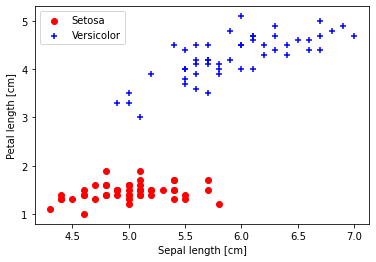

In [10]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,4].values
y = np.where(y=="Iris-setosa",0,1)
plt.scatter(X[:50,0],X[:50,1],color="red",marker = "o",
            label = "Setosa")
plt.scatter(X[50:100,0],X[50:100,1],color = "blue",
            marker = "+",label = "Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc=0)
plt.show()

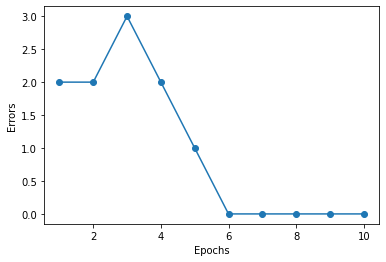

In [11]:
ppn = Perceptron(lr = .1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),
         ppn.errors_,marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
def plot_decision_regions(X,y,classifier,resolution = 0.02):
  markers = ["o","s","v",">","^"]
  colors = ["red","blue","green","cyan","grey"]
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
  x2_min,x2_max = X[:,1].min()-1,X[:1].max()+1

  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,step=resolution),
                        np.arange(x2_min,x2_max,step=resolution))
  lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1,xx2,lab,alpha = .3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y = X[y==cl,1],alpha = .8,
                c = colors[idx],
                marker = markers[idx],
                label = f"class {cl}",
                edgecolor = "black")

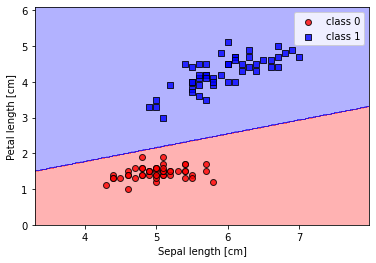

In [14]:
plot_decision_regions(X,y,ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc = 0)
plt.show()

### Adaptive linear neurons and the convergence of learning

Adaline: Adaptive Linear Neuron 🥰 <b/>

The Adaline algorithm illustrates th key concepts of defining and minimizing continuous loss functions.
The key difference between the Adaline rule and perceptron is that the weights are updated based on a linear activation function rather than a unit step function of the net input. so that σ(z) = z.

#### Minimizing loss functions with gradient descent

For Adaline, the loss function L, is defined as the <b>mean squared error (MSE)</b> between the calculated outcome and the true class label:
$$L(w,b) = \frac{1}{2n}∑^{n}_{i = 1}(y^i - σ(z^i))^2$$
given that our loss function is convex we can use <b>gradient descent</b> to find the weights that minimize our loss function.<br>
$w:= w + Δw, b := b + Δb$ <br>
$Δw = -ηΔ_{w}L(w,b), Δb = -ηΔ_{b}L(w,b)$


#### Implementing Adaline in Python

In [15]:
class AdalineGD:
  def __init__(self,lr = 0.01,n_iter = 50,random_state = 1):
    self.lr = lr
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                          size = X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []
    for _ in range(self.n_iter):
      n_input = self.n_input(X)
      output = self.activation(n_input)
      errors = (y-output)
      self.w_ += self.lr * 2 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.lr * 2 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self

  def n_input(self,X):
    return np.dot(X,self.w_) + self.b_

  def activation(self,X):
    return X

  def predict(self,X):
    return np.where(self.activation(self.n_input(X)) >= 0.5,1,0)

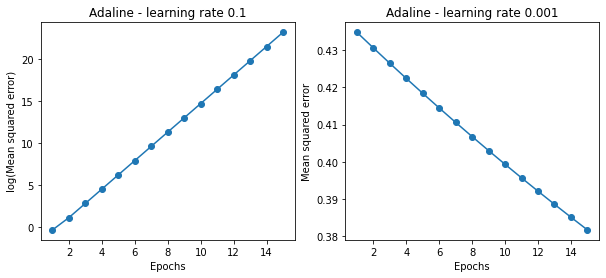

In [16]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,4].values
y = np.where(y=="Iris-setosa",0,1)
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,4))
ada1 = AdalineGD(lr = 0.1,n_iter = 15).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1),
           np.log10(ada1.losses_),marker = "o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean squared error)")
ax[0].set_title("Adaline - learning rate 0.1")
ada2 = AdalineGD(lr = 0.0001, n_iter = 15).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1),
           ada2.losses_,marker = "o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Mean squared error")
ax[1].set_title("Adaline - learning rate 0.001")
plt.show()

#### Improving gradient descent through feature scaling

In [17]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

In [18]:
ada_gd = AdalineGD(lr = 0.5,n_iter = 20)
ada_gd = ada_gd.fit(X_std,y)

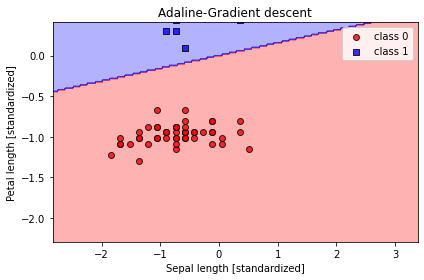

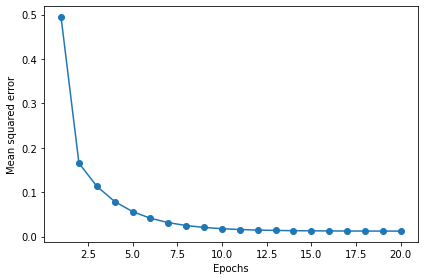

In [19]:
plot_decision_regions(X_std,y,ada_gd)
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.title("Adaline-Gradient descent")
plt.legend(loc = 0)
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada_gd.losses_)+1),
         ada_gd.losses_,marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.tight_layout()
plt.show()


#### Large-scale machine learning and stochastic gradient descent

In [20]:
from re import M
class AdalineSGD:
  def __init__(self, lr = 0.01,n_iter = 50,shuffle = True,random_state = None):
    self.lr = lr
    self.w_initialized = False
    self.n_iter = n_iter
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self,X,y):
    self._initialize_weights(X.shape[1])
    self.losses_ = []
    for _ in range(self.n_iter):
      if self.shuffle:
        self._shuffle(X,y)
      losses = []
      for xi,target in zip(X,y):
        losses.append(self._update_weights(xi,target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  def partial_fit(self,X,y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi,target in zip(X,y):
        self._update_weights(xi,target)
    else:
      self._update_weights(X,y)
    return self

  def _shuffle(self,X,y):
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self,m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0,scale = 0.01,size = m)
    self.b_ = np.float_(0.)
    self.w_initialized = True

  def _update_weights(self,xi,target):
    output = self.activation(self.n_input(xi))
    errors = (target-output)
    self.w_ += self.lr * 2. * errors * xi
    self.b_ += self.lr * 2. * errors 
    loss = errors**2
    return loss

  def n_input(self,X):
    return np.dot(X,self.w_) + self.b_

  def activation(self,X):
    return X
    
  def predict(self,X):
    return np.where(self.activation(self.n_input(X))>=0.5,1,0)

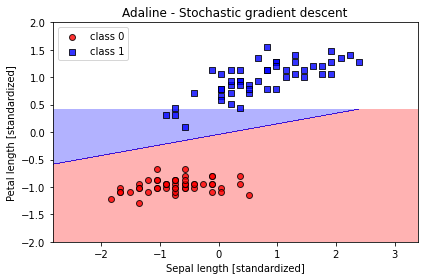

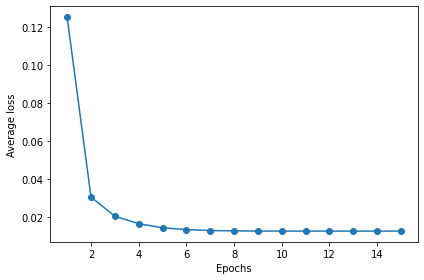

In [21]:
# let's visualize AdalineSGD
ada_sgd = AdalineSGD(lr = 0.01,n_iter=15,random_state = 1)
ada_sgd.fit(X_std,y)
plot_decision_regions(X_std,y,ada_sgd,resolution=0.001)
plt.ylim(-2.,2.)
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.title("Adaline - Stochastic gradient descent")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada_sgd.losses_)+1),ada_sgd.losses_,
         marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Average loss")
plt.tight_layout()
plt.show()

Please check on the partial fit syntax and resolve the error!!

## Machine Learning Classifiers Using Scikit-Learn

### Choosing a classification algorithm

#### Training a perceptron

In [22]:
from sklearn import datasets

In [23]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [24]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, 
                                                    random_state=1,stratify=y)

In [27]:
print("labels counts in y:",np.bincount(y))

labels counts in y: [50 50 50]


In [28]:
print("Labels counts in y_train:",np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [29]:
print("Labels counts in y_test:",np.bincount(y_test))

Labels counts in y_test: [15 15 15]


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

we used the same scaling parameters to standardize the test dataset so that both the values in the training and test dataset are comparable with one another

In [32]:
from sklearn.linear_model import Perceptron

In [33]:
ppn = Perceptron(eta0 = 0.01,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.01, random_state=1)

In [34]:
y_pred = ppn.predict(X_test_std)
print("Misclassified examples: %d" 
      % (y_test != y_pred).sum())

Misclassified examples: 2


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print("Accuracy: %.3f" % accuracy_score(y_test,y_pred))

Accuracy: 0.956


In [37]:
print("Accuracy: %.3f" % ppn.score(X_test_std,y_test))

Accuracy: 0.956


<b>Overfitting:</b> this means that the model captures the patterns in the training data well but fails to generalize well to unseen data.

In [38]:
def plot_decision_boundaries(X,y,classifier,test_idx=None,resolution=0.02):
  colors = ["red","blue","green","grey","cyan"]
  markers = ["s","o","v","^",">"]
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

  xx1 , xx2 = np.meshgrid(np.arange(x1_min,x1_max,step=resolution),
                          np.arange(x2_min,x2_max,step=resolution))
  lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  
  plt.contourf(xx1,xx2,lab,alpha=.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                color = colors[idx],
                marker = markers[idx],
                alpha = .8,
                label = f"class {cl}",
                edgecolor = "black")
  if test_idx is not None:
    X_test, y_test = X[test_idx,:], y[test_idx]
    plt.scatter(X_test[:,0],
                X_test[:,1],
                c = "none",
                marker = "o",
                alpha = 1.,
                linewidth = 1,
                s = 100,
                label = "Test set",
                edgecolor = "black")

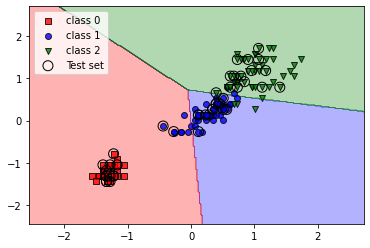

In [39]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_boundaries(X_combined_std,y_combined,classifier=ppn,
                         test_idx = range(105,150))
plt.legend(loc="upper left")
plt.show()

### Modeling class probabilities via logistic regression

#### Logistic regression and conditional probabilities

In [40]:
def sigmoid(z):
  return 1./(1.+np.exp(-z))

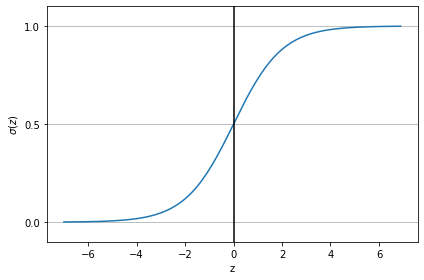

In [41]:
z = np.arange(-7,7,0.1)
sigma_z = sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0, color="k")
plt.ylim(-0.1,1.1)
plt.xlabel("z")
plt.ylabel("$\sigma (z)$")
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() # get the current axes
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#### Learning the model weights via the logistic loss function

In [42]:
def loss_1(z):
  return -np.log(sigmoid(z))

def loss_0(z):
  return -np.log(1-sigmoid(z))

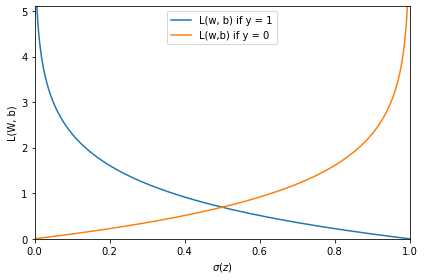

In [43]:
z = np.arange(-10,10,0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label = "L(w, b) if y = 1")
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, label = "L(w,b) if y = 0")
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel("L(W, b)")
plt.legend(loc=0)
plt.tight_layout()
plt.show()

#### Converting an Adaline implementation into an algorithm for logistic regression

In [44]:
class LogisticRegressionGD:
  def __init__(self,lr=0.01,n_iter = 15, random_state = 1):
    self.lr = lr
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01,size = X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []
    for _ in range(self.n_iter):
      n_input = self.n_input(X)
      output = self.activation(n_input)
      error = (y-output)
      self.w_ += self.lr * 2.0 * X.T.dot(error) / X.shape[0]
      self.b_ += self.lr * 2.0 * error.mean()
      loss = (-y.dot(np.log(output)) -(1-y).dot(np.log(1-output))) / X.shape[0] 
      self.losses_.append(np.mean(loss))
    return self
  
  def n_input(self,X):
    return np.dot(X,self.w_) + self.b_

  def activation(self,z):
    return 1. / (1 + np.exp(-np.clip(z,-250,250)))
  
  def predict(self,X):
    return np.where(self.activation(self.n_input(X))>=0.5,1,0)

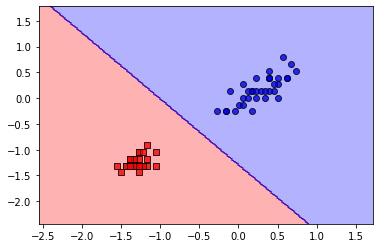

In [45]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(lr = 0.3, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_boundaries(X=X_train_01_subset,
                      y = y_train_01_subset,
                      classifier = lrgd)

#### Training a logistic regression model with scikit-learn

In [46]:
from sklearn.linear_model import LogisticRegression

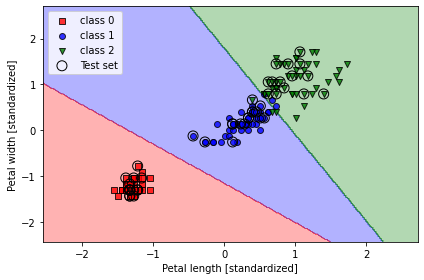

In [47]:
lr = LogisticRegression(C = 100.0, solver = "lbfgs",multi_class = "multinomial")
lr.fit(X_train_std, y_train)
plot_decision_boundaries(X_combined_std, y_combined, classifier = lr,
                         test_idx = range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

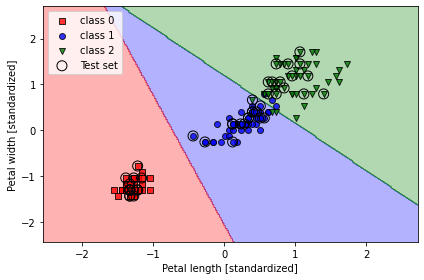

In [48]:
lr = LogisticRegression(C = 100.0, solver = "lbfgs",multi_class = "ovr")
lr.fit(X_train_std, y_train)
plot_decision_boundaries(X_combined_std, y_combined, classifier = lr,
                         test_idx = range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [49]:
lr.predict_proba(X_test_std[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [50]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [51]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

In [52]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

#### Tackling overfitting via regularization

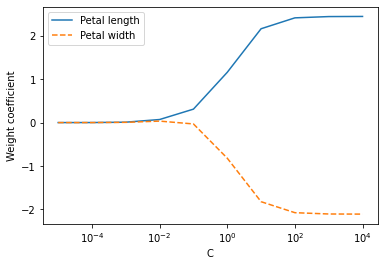

In [53]:
weights, params = [], []
for c in np.arange(-5,5):
  lr = LogisticRegression(C = 10. **c, multi_class = "ovr")
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],label = "Petal length")
plt.plot(params, weights[:,1], linestyle = "--",
         label = "Petal width")
plt.ylabel("Weight coefficient")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()

#### Maximum margin classificatin with support vector machines

##### Dealing with a nonlinearly separable case using slack variables

In [54]:
from sklearn.svm import SVC

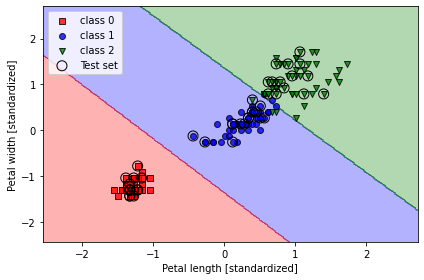

In [55]:
svm = SVC(kernel = "linear", C = 1., random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_boundaries(X_combined_std, y_combined,
                         classifier = svm,
                         test_idx = range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### Alternative implementation in scikit-learn

In [56]:
from sklearn.linear_model import SGDClassifier

In [57]:
ppn = SGDClassifier(loss = "perceptron")
lr = SGDClassifier(loss = "log")
svm = SGDClassifier(loss = "hinge")

### Solving nonlinear problems using a kernel SVM

#### Kernel methods for linearly inseparable data

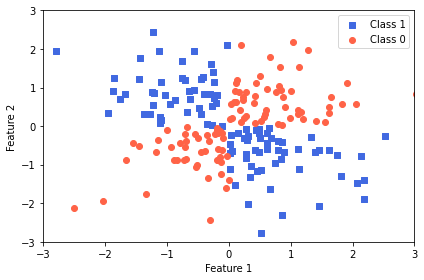

In [58]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor,1,0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1,1],
            c = "royalblue", marker = "s",
            label = "Class 1")
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0,1],
            c = "tomato", marker = "o",
            label = "Class 0")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

#### Using the kernel trick to find separating hyperplanes in a high-dimensional space

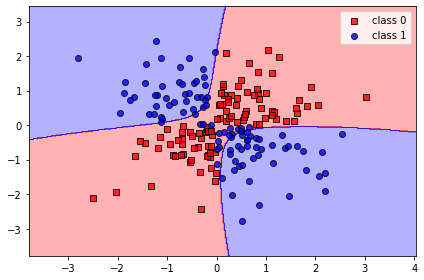

In [59]:
svm = SVC(kernel = "rbf", random_state = 1, gamma = 0.1, C = 10.)
svm.fit(X_xor, y_xor)
plot_decision_boundaries(X_xor, y_xor, classifier=svm)
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

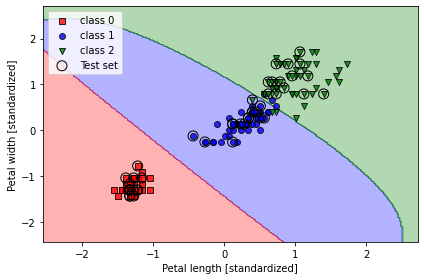

In [60]:
svm = SVC(kernel = "rbf", random_state = 1, gamma = 0.2, C = 1.)
svm.fit(X_train_std, y_train)
plot_decision_boundaries(X_combined_std, y_combined, classifier=svm,
                         test_idx = range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

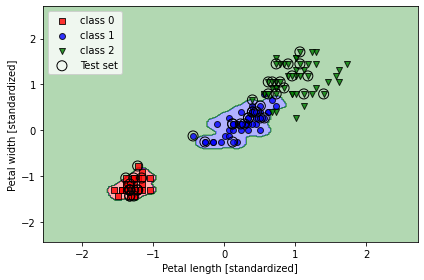

In [61]:
svm = SVC(kernel = "rbf", random_state = 1, gamma = 100., C = 1.)
svm.fit(X_train_std, y_train)
plot_decision_boundaries(X_combined_std, y_combined, classifier=svm,
                         test_idx = range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

### Decision tree learning

#### Maximizing IG- getting the most bang for your buck

In [62]:
def entropy(p):
  return -p*np.log2(p) - (1-p)*np.log2(1-p)

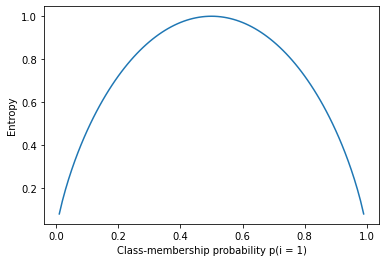

In [63]:
x = np.arange(0.,1.,0.01)
ent = [entropy(p) if p != 0. else None for p in x]
plt.plot(x,ent)
plt.xlabel("Class-membership probability p(i = 1)")
plt.ylabel("Entropy")
plt.show()